<a href="https://colab.research.google.com/github/MartaPCastillo/Simulacion-I/blob/main/Estimaci%C3%B3n_ra%C3%ADz_arctan(x).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimación de $\sqrt{\arctan{(x)}}$

### 1. Identifique las variables

Tenemos una: $x_i$.

### 2 y 3. Determine la distribución de probabilidad y modele las variables aleatorias

Sea

$x_i= \left\{ \begin{array}{lcc} 1 & si & \text{el dardo cae dentro del punto} \\ \\ 0 & si & \text{cae afuera}  \end{array} \right.$

Además,

- P(dardo cae dentro del punto) = p

- P(cae afuera) = 1 - p

### 4. Defina el modelo del sistema y los objetivos de la simulación

Consideremos

$z = 4 \cdot \dfrac{x_1 + x_2 + ... + x_n}{N}$

Y calculamos el valor esperado y la varianza

Primero lo calculamos de $x_i$

Valor esperado

$E[x_i] = 1 \cdot p + 0(1 - p)$

$\therefore E[x_i] = p$

Varianza

$V[x_i] = E[(x_i)^2] - E[x_i]^2$

$\longrightarrow V[x_i] = (1^2 \cdot p + 0^2(1 - p)) - p^2$

$\longrightarrow V[x_i] = p - p^2$

$\therefore V[x_i] = p(1-p)$

Valor esperado

$E[Z_N] = \dfrac{4}{N}(E[x_1]+...+E[x_n])$

$\longrightarrow E[Z_N] = \dfrac{4}{N}Np$

$\therefore E[Z_N] = 4p$

Varianza

$V[Z_N] = \dfrac{4^2}{N^2}(V[x_1]+...+V[x_n])$

$\longrightarrow V[Z_N] = \dfrac{16}{N^2}Np(1-p)$


$\therefore V[Z_N] = \dfrac{16p(1-p)}{N}$

Ahora, usamos la desigualdad de Chebyshev

$P(|Z_N - \pi| \geq \epsilon) \leq \dfrac{Var(Z_N)}{\epsilon ^2}$

$\longrightarrow P(|Z_N - \pi| \geq \epsilon) \leq \dfrac{\dfrac{16p(1-p)}{N}}{\epsilon ^2}$

$\longrightarrow P(|Z_N - \pi| \geq \epsilon) \leq \dfrac{16p(1-p)}{N \epsilon ^2}$

Posteriormente, si damos un valor de $\epsilon$ podemos calcular el valor de $N$.

###Para ejemplificarlo con valor de $\epsilon$

¿Cuántos dardos se deben lanzar para que la probabilidad de cometer un $\textit{error}$ mayor o igual que 0.1 sea menor que 0.01?

(Supongamos que $p = \dfrac{\pi}{4}$).

Datos:

$\epsilon = 0.1$

$P(|Z_N - \pi| \geq \epsilon) = 0.01$

$p = \dfrac{\pi}{4}$

$N = \dfrac{16p(1-p)}{P(|Z_N - \pi| \geq \epsilon) \cdot \epsilon ^2}$

$\longrightarrow N = \dfrac{16 \cdot \dfrac{\pi}{4} \left(1-\dfrac{\pi}{4}\right)}{(0.01)(0.1)^2}$

$\therefore N \approx 26,000$

######Si no conocemos p

Sabemos que $0 < p < 1$.

Por la gráfica de $p(1-p)$, vemos que $p(1-p) \leq \dfrac{1}{4}$

Volvemos a calcular

$N = \dfrac{16 \left(\dfrac{1}{4}\right)}{(0.01)(0.1)^2}$

$\therefore N = 40,000$

###Simulación

In [2]:
import numpy as np
import random as rnd
import math
import matplotlib.pyplot as plt

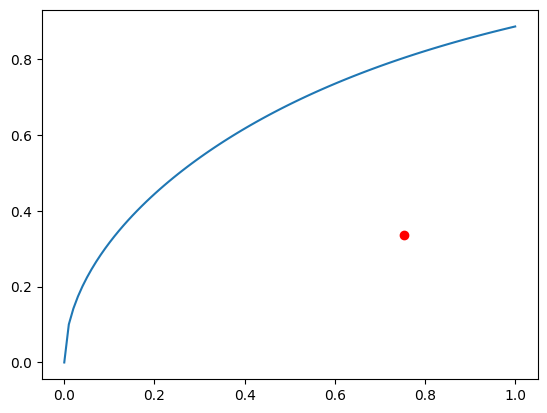

In [11]:
#Este es el experimento
x = np.linspace(0,1,100)
u_1 = rnd.random()
u_2 = rnd.random()
plt.plot(x, np.sqrt(np.arctan(x)))
plt.scatter(u_1,u_2,color="red")
plt.show()

In [16]:
def estimacion(N):
    exitos = 0
    lista = []

    for i in range(N):
        u_1 = rnd.uniform(0,1)
        u_2 = rnd.uniform(0,1)

        if u_2 <= np.sqrt(np.arctan(u_1)):
            exitos += 1

        prob=exitos/(i+1)
        lista.append(prob)
    return lista

In [17]:
G = estimacion(1000)
print(G)

[1.0, 1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8571428571428571, 0.875, 0.8888888888888888, 0.9, 0.9090909090909091, 0.9166666666666666, 0.9230769230769231, 0.8571428571428571, 0.8666666666666667, 0.875, 0.8235294117647058, 0.7777777777777778, 0.7894736842105263, 0.8, 0.8095238095238095, 0.8181818181818182, 0.782608695652174, 0.75, 0.76, 0.7692307692307693, 0.7407407407407407, 0.75, 0.7241379310344828, 0.7333333333333333, 0.7096774193548387, 0.71875, 0.696969696969697, 0.6764705882352942, 0.6857142857142857, 0.6944444444444444, 0.6756756756756757, 0.6842105263157895, 0.6923076923076923, 0.675, 0.6585365853658537, 0.6666666666666666, 0.6744186046511628, 0.6590909090909091, 0.6444444444444445, 0.6521739130434783, 0.6595744680851063, 0.6458333333333334, 0.6530612244897959, 0.66, 0.6666666666666666, 0.6730769230769231, 0.660377358490566, 0.6666666666666666, 0.6727272727272727, 0.6785714285714286, 0.6842105263157895, 0.6896551724137931, 0.6779661016949152, 0.6666666666666666, 0.65573770491

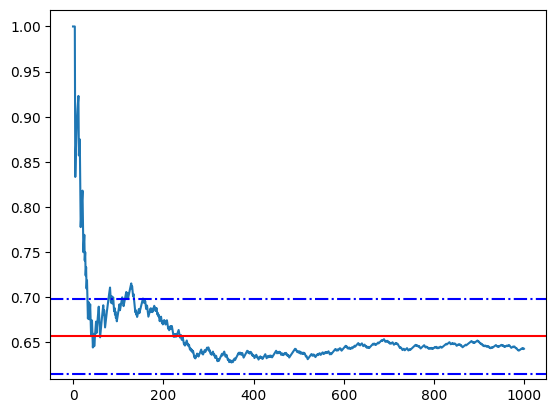

In [21]:
plt.plot(G)
plt.axhline(y=media, color='r', linestyle='-')
plt.axhline(y=media + desv_est, color='b', linestyle='dashdot')
plt.axhline(y=media - desv_est, color='b', linestyle = "dashdot")

Se ve que una muestra de tamaño N $\approx$ 500 da un resultado aceptable.

Calculamos la media y la varianza de la estimación.

In [19]:
media = np.mean(G)
varianza = np.var(G)
desv_est = np.std(G)

In [20]:
print(media)
print(varianza)
print(desv_est)

0.6568707153368537
0.0017278486634482526
0.04156739904598618


Se tiene que correr de nuevo la gráfica, después de haber calculado la media, varianza y desviación estándar, para que nos grafique bien nuestras líneas.

Ahora, con eso podemos modificar la función y convertirla en una corrida de la simulación: lista $\longrightarrow$ lista[-1] y fijamos N=500 (por ejemplo).

In [22]:
def simulacion(M):
    r = []

    for i in range(M):
        R=estimacion(500)
        r.append(R)

    return r

In [27]:
H=simulacion(10000)
print(H)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
plt.hist(H, bins=30)
plt.show()

In [ ]:
plt.plot(H)